In [1]:
#Let's import the required libraries

import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
df = pd.read_csv(r'spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#Checking not null values
df.notnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
3,True,True,False,False,False
4,True,True,False,False,False
...,...,...,...,...,...
5567,True,True,False,False,False
5568,True,True,False,False,False
5569,True,True,False,False,False
5570,True,True,False,False,False


Lets drop unnecessary columns

In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets rename the columns as required v1 as target and v2 as email_text

In [11]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

There are 4825 ham and 747 spam in v1 column

In [13]:
df.v2.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

all the data is in integer format 

In [14]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham in Email')

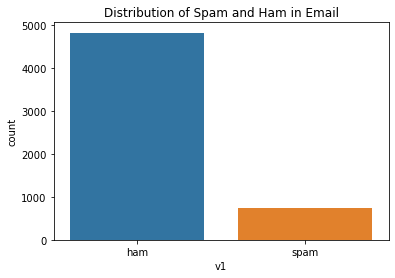

In [17]:
#plotting graph for distribution

sns.countplot(x = "v1", data = df)
df.loc[:, 'v1'].value_counts()
plt.title('Distribution of Spam and Ham in Email')

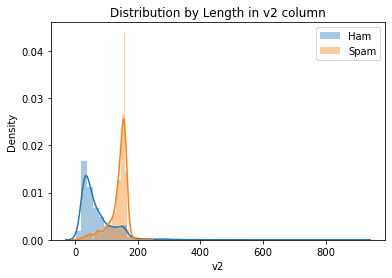

In [21]:
# plotting graph by length.
ham =df[df['v1'] == 'ham']['v2'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['v1'] == 'spam']['v2'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length in v2 column')
plt.legend()

this clearly shows that spam length density is high compared to ham

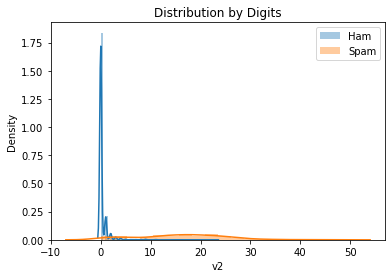

In [23]:
#plotting graph by digits.

ham1 = df[df['v1'] == 'ham']['v2'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['v1'] == 'spam']['v2'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

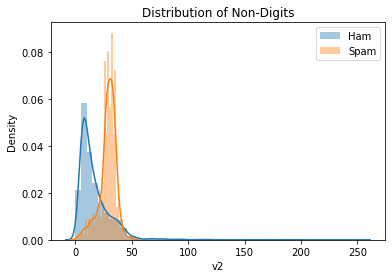

In [24]:
#plotting graph for non-digits.

ham2 = df[df['v1'] == 'ham']['v2'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = df[df['v1'] == 'spam']['v2'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [28]:
#for counting frequently occurence of spam and ham.
from collections import Counter
count1 = Counter(" ".join(df[df['v1']=='ham']["v2"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['v1']=='spam']["v2"]).split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words of spam", 1 : "count_"})

In [ ]:
Graph for top 30 words of ham


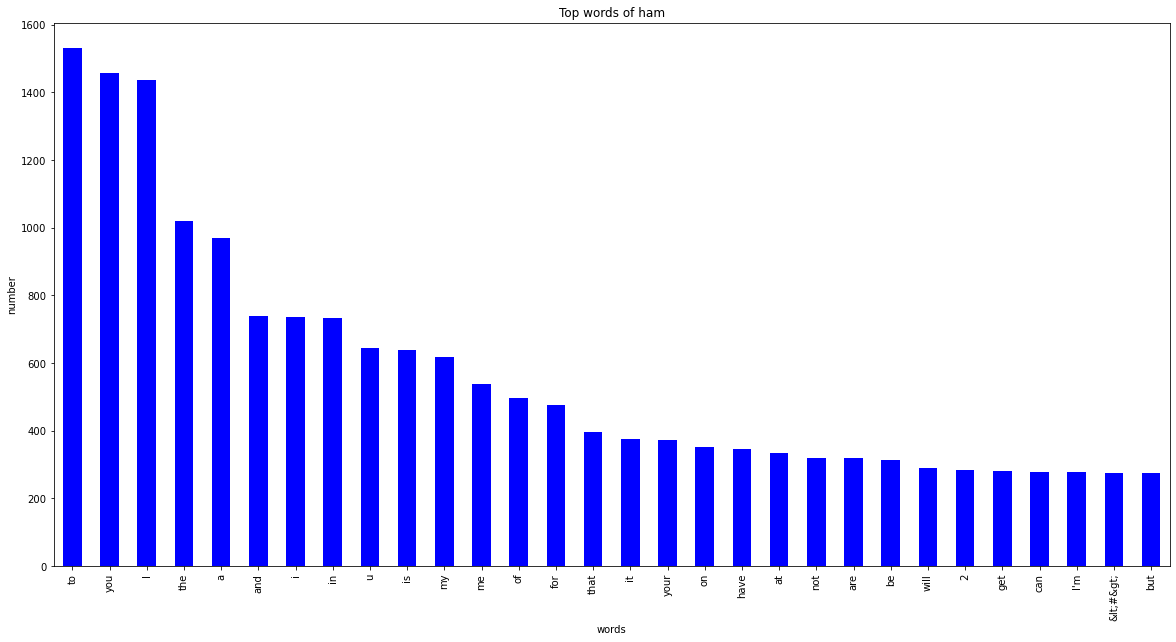

In [34]:
df1.plot.bar(legend = False, color = 'blue',figsize = (20,10))
y_pos = np.arange(len(df1["words of ham"]))
plt.xticks(y_pos, df1["words of ham"])
plt.title('Top words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
Graph for top  words of spam


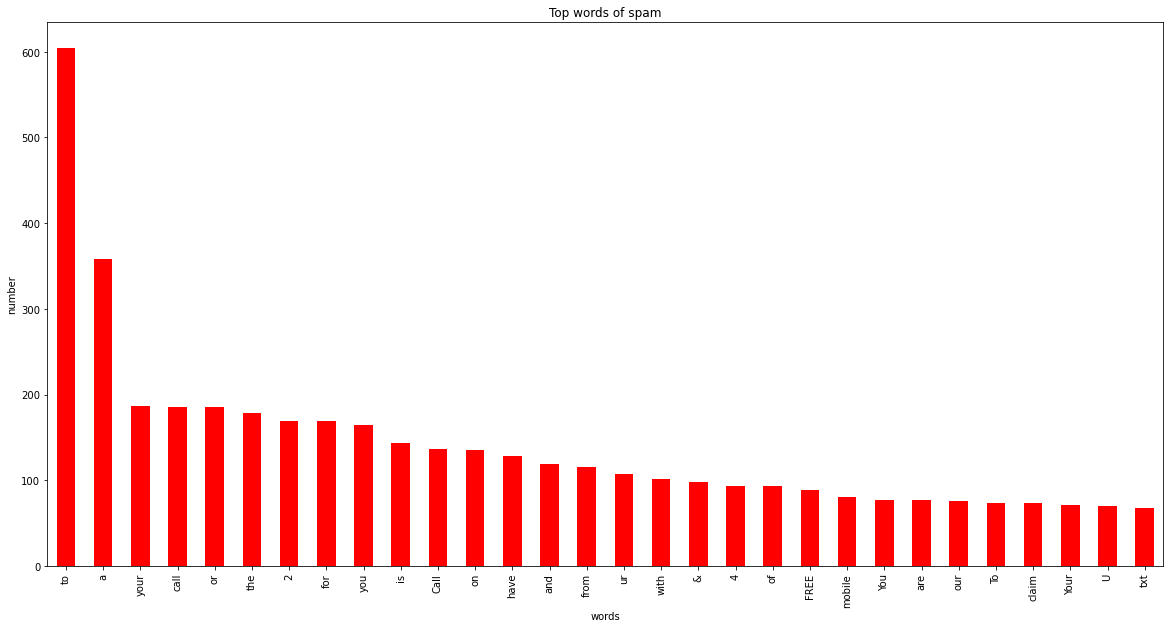

In [35]:
df2.plot.bar(legend = False, color = 'red', figsize = (20,10))
y_pos = np.arange(len(df2["words of spam"]))
plt.xticks(y_pos, df2["words of spam"])
plt.title('Top words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# Splitting the data into training

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_pred = train_test_split(df['v2'], df['v1'], test_size = 0.3, random_state = 35)
print ("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_pred: ", len(y_pred))

x_train:  3900
x_test:  1672
y_train:  3900
y_pred:  1672


In [41]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', df['v1'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [44]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 43719 stored elements in Compressed Sparse Row format>

In [45]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 17679 stored elements in Compressed Sparse Row format>

# Model Building

# Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  0.9808612440191388
Random Forest confusion_matrix:  [[1447   30]
 [   2  193]]


# KNeighbors Classification


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc))

KNeighbors Accuracy_score:  0.8666267942583732
KNeighbors confusion_matrix:  [[1449    0]
 [ 223    0]]


# SVM Classification

In [52]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.8313397129186603
SVM confusion_matrix:  [[1306  139]
 [ 143   84]]


# Naive bayes

In [82]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)
y_mnb = mnb.predict(X_test_cv)
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9838516746411483
Naive Bayes confusion_matrix:  [[1438   16]
 [  11  207]]


# Decision tree Classification

In [83]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test)) 

Decision Tree Accuracy:  0.9700956937799043
Decision Tree confusion_matrix:  [[1426   27]
 [  23  196]]


# Extra Tree Classification

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=37, random_state=252)
etc.fit(X_train_cv,y_train)
y_etc = etc.predict(X_test_cv)
print('Extra Tree Accuracy_score: ',accuracy_score(y_test,y_etc))
print('Extra Tree confusion_matrix: ', confusion_matrix(y_etc, y_test))

Extra Tree Accuracy_score:  0.9820574162679426
Extra Tree confusion_matrix:  [[1445   26]
 [   4  197]]


# Adaboost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

AdaBoost Accuracy_score:  0.9683014354066986
AdaBoost confusion_matrix:  [[1434   38]
 [  15  185]]


# Bagging Classification

In [87]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 

Bagging Accuracy_score:  0.9659090909090909
Bagging confusion_matrix:  [[1420   28]
 [  29  195]]


# Text Processing

In [122]:
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext
    
# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

df['v2']=pd.DataFrame(df.v2.apply(cleaned_html))
df['v2']=pd.DataFrame(df.v2.apply(cleaned1))
df['v2']=pd.DataFrame(df.v2.apply(cleaned2))

In [90]:
cv = CountVectorizer()  
xtrain = cv.fit_transform(x_train)

In [145]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs=-1)
#classifier = svm.SVC(kernel='rbf',gamma=1e-3,C=100)
classifier.fit(xtrain,y_train)

# printing the best model
classifier.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

In [149]:
X_test = cv.transform(X_test)
ypred = classifier.predict(xtest)

In [151]:
# model score# print(xtest.shape)
accuracy_score(y_test,ypred)

0.9832535885167464

In [153]:
# confusion matrix
A=confusion_matrix(y_test,ypred)
print(A)

[[1445    4]
 [  24  199]]


In [154]:
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.9904043865661412


In [155]:
# saving the model to disk
import pickle
pickle.dump(classifier, open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

# Prediction

In [156]:
test="hello. You have won 300000000$. Give your contact details."
test=clean_html(test)
test=clean_text1(test)
test=clean_text2(test)
test=cv.transform([test])
labpred=classifier.predict(test)
print(labpred[0])

ham


In [200]:
test="hello. You have won 300000000$. Give your contact details."
test=clean_html(test)
test=clean_text1(test)
test=clean_text2(test)
test=cv.transform([test])
labpred=classifier.predict(test)
output = "This is a " + labpred[0]
print(output)

This is a ham
